In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error,r2_score

In [3]:
#STEPS
#1. GET THE DATASET
#2. CLEAN AND PROCESS THE DATASET
#3. DESCRIPTIVE ANALYSIS AND PARTERN FINDING IF NEEDED
#4. VISUAL ANALYSIS IF NEEDED
#5. PROCESSING OF STRING COLUMN TO NUMERICAL TO FIT IN FOR THE MACHINE ALGORITHM
#6. FOR THE SUPERVISED TYPE OF MACHINE LEARNING SEPERATE THE INDEPENDENT COLUMNS FROM THE DEPENDENT COLUMN WHILE FOR THE UNSUPERVISED TYPE OF MACHINE LEARNING JUST FIND OUT YOUR TARGET COLUMNS
#7.FOR THE SUPERVISED MACHINE LEARNING SPLIT YOUR DATA INTO TRAIN AND TEST
#### THE TRAIN DATA WILL BE USED TTO TRAIN THE MODEL WHILE THE TEST DATA WILL BE USED TO EVALUATE THE PERFORMANCE OF THE MODEL AFTER LEARNING FROM THE TRAING DATASET WHILE FOR THE UNSUPERVISED MACHINE LEARNING THE MODEL WILL BE BUILD ACCORDING TO THE  TARGET COLUMNS AND WILL THEN INTERPRET THE OUT PUT
#8.bUILD AND TRAING THE MODEL
#9. EVALUTE THE MODEL BY FINDING OUT THE ACCURACY AND THE LEVEL OF ERROR

In [4]:
df = pd.read_csv('linear-regression-dataset.csv')
df.head()

,deneyim,maas
0,0.5,2500
1,0.0,2250
2,1.0,2750
3,5.0,8000
4,8.0,9000


In [6]:
df.shape

(14, 2)

In [5]:
X = df[['deneyim']]
y = df['maas']

In [7]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state = 1)

In [8]:
model1 = LinearRegression()
model1.fit(x_train,y_train)

LinearRegression()

In [9]:
pred = model1.predict(x_test)
pred

array([ 7306.33492823,  9499.17703349, 18270.54545455])

In [12]:
print(r2_score(y_test,pred))

0.9514950560486757


In [13]:
print(mean_absolute_error(y_test,pred))

1140.7655502392352


In [14]:
print(mean_absolute_percentage_error(y_test,pred))

0.09691036682615632


In [15]:
print(model1.coef_)

[1096.42105263]


c:\Users\Simeon\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='maas'>

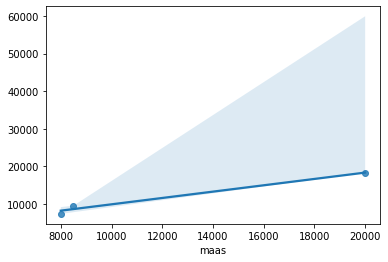

In [17]:
import seaborn as sns
sns.regplot(y_test,pred)

In [18]:
np.sqrt(mean_squared_error(y_test,pred))

1220.7291538048146

In [19]:
df2 = pd.read_csv('insurance.csv')
df2.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [20]:
df2['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [25]:
df2['sex']=pd.get_dummies(df2['sex'],drop_first =True)
df2.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520


In [27]:
categorical = ['smoker','region']
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for x in categorical:
    df2[x] = encoder.fit_transform(df2[x])
    
df2.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [28]:
X =df2.drop('charges',axis=1)
y = df2['charges']

In [29]:
df2.shape

(1338, 7)

In [30]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state = 1)

In [31]:
model2 = LinearRegression()
model2.fit(x_train,y_train)

LinearRegression()

In [32]:
pred = model2.predict(x_test)
pred

array([ 4312.08656955, 12859.49737555, 12370.50358911, 13549.5511475 ,
         410.55490166, 32052.76977091, 13170.26923221, 12248.5052133 ,
        3713.54941225, 29760.32281711, 11338.50159148, 17269.6492891 ,
        8961.13430709,  8184.25429812,  3376.85292436, 10278.37012511,
        3883.36513262,  6793.01504696, 15270.57009799, 14255.67564306,
       12438.83818074, 33176.73034139,  9068.32669468,  8835.62475682,
        2922.83938461,  8155.7017465 ,  9497.57563203, 11015.04509043,
        7503.17666222,  4307.99883589, 13939.03683704,  5657.88640469,
       34592.37757194, 26941.6112407 , 33661.91509295,  9552.53576302,
       30183.50964412, 26485.52800009, 15397.47566838, 33857.57796843,
        6575.23382913, 14015.49951905, 11034.83628114, 14878.37537422,
        4056.87355672, 13036.25142266,  4582.39598034, 28857.50476848,
        7305.25026916, 14215.34197814, 13570.38542044, 12171.25378059,
        1860.5537778 ,  8743.00482524, 25989.68277284, 10318.04975471,
      

In [33]:
print(model2.coef_)

[  258.01557886  -244.31610607   315.08300514   412.23885375
 23766.9743197   -330.62676068]


In [34]:
coef = pd.DataFrame(data = model2.coef_, index = X.columns, columns = ['coef'])
coef

,coef
age,258.015579
sex,-244.316106
bmi,315.083005
children,412.238854
smoker,23766.974320
region,-330.626761


In [4]:
"//login page with python?
def log_in():
    username = input("Please enter your username : ")
    password = input("Please enter your password : ")

    with open('test_file.txt', 'r') as file:
        for line in file:
            if line == 'Username:{0}, Password:{1}'.format(username, password):
                print ("Greetings," , username, "you are now logged in")
                return True, username, password
    print (" Sorry username and password incorrect please re-enter for validation ")
    return False, '', ''

def new_user():
    succes = False
    while not succes:
        new_user = input("Please enter your new username : ")
        new_pass = input("Please enter your new password : ")

        exists = False
        with open("test_file.txt","r") as file:
            for line in file:
                if line.split(',')[0] == 'Username:'+new_user:
                    print ('Invalid username: {0} already exsist'.format(new_user))
                    exists = True

        if not exists:
            with open("test_file.txt","a") as file:
                file.write('Username:{0}, Password:{1}'.format(new_user, new_pass))
            succes = True
    print ('You made a new user with username:{0} and password:{1}'.format(new_user, new_pass))

def main():
    command = username = password = ''
    logged_in = False
    while command != 'quit':
        command = input('Please type a command: ')
        if command == 'log in':
            logged_in, username, passowrd = log_in()
        if command == 'log out':
            logged_in = False
            username = passowrd = ''
        if command == 'new user':
            if not logged_in:
                new_user()
            else:
                print ('First logout to make a new user')

main()




'//python login code?'